In [1]:
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import chart_studio.tools as tls
import chart_studio
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly_api_key import plotly_api_key

In [2]:
# Opening raw NFL data
raw_data = pd.read_csv('resources/NFL_Play_by_Play_2009_2018.csv', low_memory=False)

In [3]:
raw_data.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [57]:
play_by_down_columns = ['play_type', 'down', 'ydstogo']

In [58]:
by_down = raw_data[play_by_down_columns]

In [59]:
by_down.head()

,play_type,down,ydstogo
0,kickoff,NaN,0
1,pass,1.0,10
2,run,2.0,5
3,pass,3.0,8
4,punt,4.0,8


In [79]:
passes_runs = by_down.loc[(by_down.play_type == 'pass') | (by_down.play_type == 'run')].dropna()

In [81]:
passes_runs.head()

,play_type,down,ydstogo
1,pass,1.0,10
2,run,2.0,5
3,pass,3.0,8
5,run,1.0,10
6,pass,2.0,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28e0a190>]],
      dtype=object)

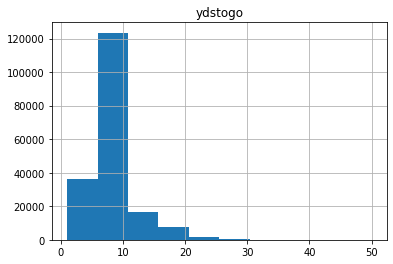

In [97]:
passes_runs[passes_runs.play_type == 'pass'][['play_type', 'ydstogo']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24365e50>]],
      dtype=object)

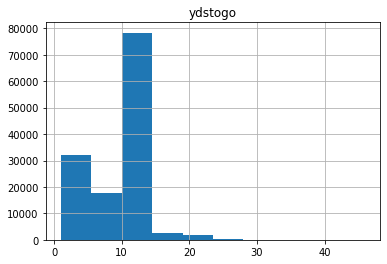

In [98]:
passes_runs[passes_runs.play_type == 'run'][['play_type', 'ydstogo']].hist()

In [93]:
passes_runs.groupby(['down', 'ydstogo'])['play_type'].value_counts()

down  ydstogo  play_type
1.0   1        run          1039
               pass          341
      2        run           459
               pass          252
      3        run           448
                            ... 
4.0   30       pass            2
      32       pass            1
      34       pass            1
      35       pass            2
      43       pass            1
Name: play_type, Length: 278, dtype: int64

In [100]:
import plotly.graph_objects as go

import numpy as np

x0 = passes_runs[passes_runs.play_type == 'pass']['play_type'].count()
# Add 1 to shift the mean of the Gaussian distribution
x1 = passes_runs[passes_runs.play_type == 'run']['play_type'].count() + 1

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

ValueError: 
    Invalid value of type 'numpy.int64' received for the 'x' property of histogram
        Received value: 186172

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [62]:
passes_runs_per_down = passes_runs.groupby(['down'])['play_type'].value_counts()

In [65]:
passes_runs_per_down

down  play_type
1.0   run          72095
      pass         68993
2.0   pass         61368
      run          44794
3.0   pass         52805
      run          13915
4.0   pass          3006
      run           1715
Name: play_type, dtype: int64

In [51]:
values = passes_runs_per_down.values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22b84ed0>,
      dtype=object)

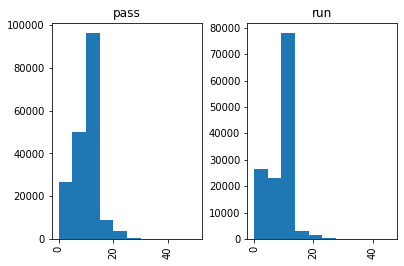

In [67]:
passes_runs['ydstogo'].hist(by=passes_runs['play_type'])

In [31]:
import plotly.graph_objects as go

import numpy as np

x0 = values[0]
# Add 1 to shift the mean of the Gaussian distribution
# x1 = np.random.randn(500) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
# fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

ValueError: 
    Invalid value of type 'numpy.int64' received for the 'x' property of histogram
        Received value: 68993

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series